In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [1]:
# Import appropriate libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
# Read all the CSV files and create dataframes
df = pd.read_csv('../input/covid19-global-forecasting-week-3/train.csv') # from Kaggle
df1 = pd.read_csv('../input/covid19-global-forecasting-week-3/test.csv')
df2 = pd.read_csv('../input/covid19-global-forecasting-week-3/submission.csv')

df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


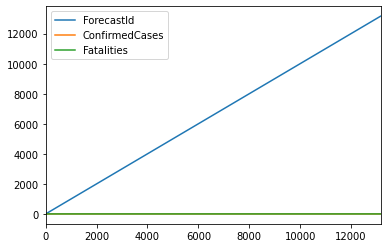

In [4]:
df2.plot()

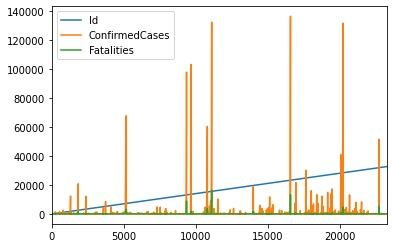

In [5]:
df.plot()

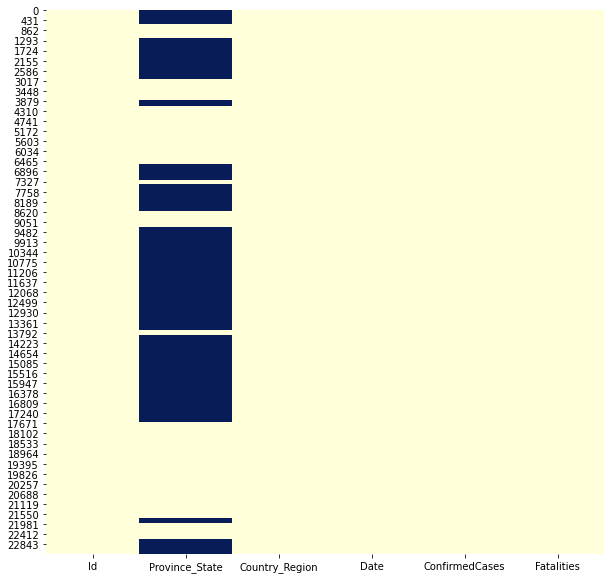

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar = False, cmap = 'YlGnBu')

In [7]:
#setting the index to be the last_update

df.index = pd.DatetimeIndex(df.Date)

In [8]:
df

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
Date,,,,,,
2020-01-22,1,NaN,Afghanistan,2020-01-22,0.0,0.0
2020-01-23,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2020-01-24,3,NaN,Afghanistan,2020-01-24,0.0,0.0
2020-01-25,4,NaN,Afghanistan,2020-01-25,0.0,0.0
2020-01-26,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
2020-04-02,32707,NaN,Zimbabwe,2020-04-02,9.0,1.0
2020-04-03,32708,NaN,Zimbabwe,2020-04-03,9.0,1.0
2020-04-04,32709,NaN,Zimbabwe,2020-04-04,9.0,1.0


In [9]:
df['Country_Region'].value_counts()

US                4104
China             2508
Canada             912
France             760
United Kingdom     760
                  ... 
Japan               76
Cote d'Ivoire       76
Estonia             76
Djibouti            76
Korea, South        76
Name: Country_Region, Length: 180, dtype: int64

In [10]:
df['Province_State'].value_counts()

British Columbia            76
Hainan                      76
Curacao                     76
Guizhou                     76
Henan                       76
                            ..
Turks and Caicos Islands    76
New Brunswick               76
Colorado                    76
Zhejiang                    76
Xinjiang                    76
Name: Province_State, Length: 130, dtype: int64

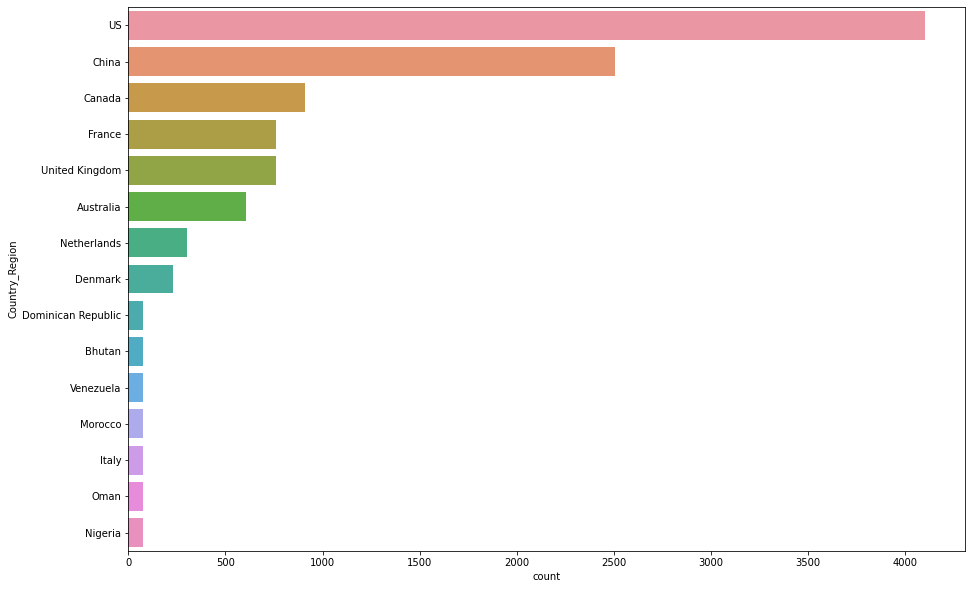

In [11]:
# Let's plot and see the status

plt.figure(figsize = (15,10))
sns.countplot(y = 'Country_Region', data = df, order = df['Country_Region'].value_counts().iloc[:15].index)

In [12]:
df.resample('Y').size()

Date
2020-12-31    23256
Freq: A-DEC, dtype: int64

In [13]:
df.resample('M').size()

Date
2020-01-31    3060
2020-02-29    8874
2020-03-31    9486
2020-04-30    1836
Freq: M, dtype: int64

Text(0, 0.5, 'Number of confirmed cases')

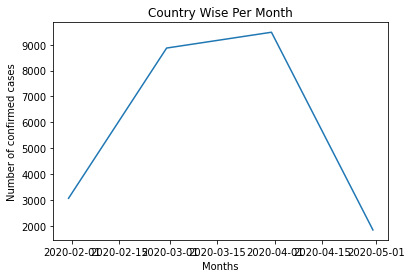

In [14]:
# Let's see the frequency

plt.plot(df.resample('M').size())
plt.title('Country Wise Per Month')
plt.xlabel('Months')
plt.ylabel('Number of confirmed cases')

In [16]:
# Preparing the data for forcast

df_prophet = df.resample('M').size().reset_index()

In [17]:
df_prophet

,Date,0
0,2020-01-31,3060
1,2020-02-29,8874
2,2020-03-31,9486
3,2020-04-30,1836


In [18]:
df_prophet.columns = ['Date', 'Confirmed_Cases']

In [19]:
df_prophet

,Date,Confirmed_Cases
0,2020-01-31,3060
1,2020-02-29,8874
2,2020-03-31,9486
3,2020-04-30,1836


In [20]:
df_prophet_df = pd.DataFrame(df_prophet)

In [21]:
df_prophet_df

,Date,Confirmed_Cases
0,2020-01-31,3060
1,2020-02-29,8874
2,2020-03-31,9486
3,2020-04-30,1836


In [24]:
# Make Predictions

df_prophet_df.columns

Index(['Date', 'Confirmed_Cases'], dtype='object')

In [25]:
df_prophet_final = df_prophet_df.rename(columns={'Date': 'ds', 'Confirmed_Cases': 'y'})

In [26]:
df_prophet_final

,ds,y
0,2020-01-31,3060
1,2020-02-29,8874
2,2020-03-31,9486
3,2020-04-30,1836


In [27]:
m = Prophet()
m.fit(df_prophet_final)

In [28]:
# Forecasting future cases for 90 days

future = m.make_future_dataframe(periods = 90)
forecast = m.predict(future)

In [29]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-31,6278.804778,2387.568057,10286.930100,6278.804778,6278.804778,0.0,0.0,0.0,0.0,0.0,0.0,6278.804778
1,2020-02-29,5976.442906,2199.875821,10196.194498,5976.442906,5976.442906,0.0,0.0,0.0,0.0,0.0,0.0,5976.442906
2,2020-03-31,5653.228471,1795.329575,9753.981020,5653.228471,5653.228471,0.0,0.0,0.0,0.0,0.0,0.0,5653.228471
3,2020-04-30,5340.440306,1395.843544,9770.100316,5340.440306,5340.440306,0.0,0.0,0.0,0.0,0.0,0.0,5340.440306
4,2020-05-01,5330.014034,1197.263391,9257.438839,5330.014034,5330.014034,0.0,0.0,0.0,0.0,0.0,0.0,5330.014034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2020-07-25,4443.780901,304.330028,8435.271015,4443.780753,4443.781040,0.0,0.0,0.0,0.0,0.0,0.0,4443.780901
90,2020-07-26,4433.354628,639.283913,8566.555223,4433.354477,4433.354770,0.0,0.0,0.0,0.0,0.0,0.0,4433.354628
91,2020-07-27,4422.928356,333.371470,8492.520059,4422.928205,4422.928499,0.0,0.0,0.0,0.0,0.0,0.0,4422.928356
92,2020-07-28,4412.502084,331.568462,8449.925784,4412.501932,4412.502230,0.0,0.0,0.0,0.0,0.0,0.0,4412.502084


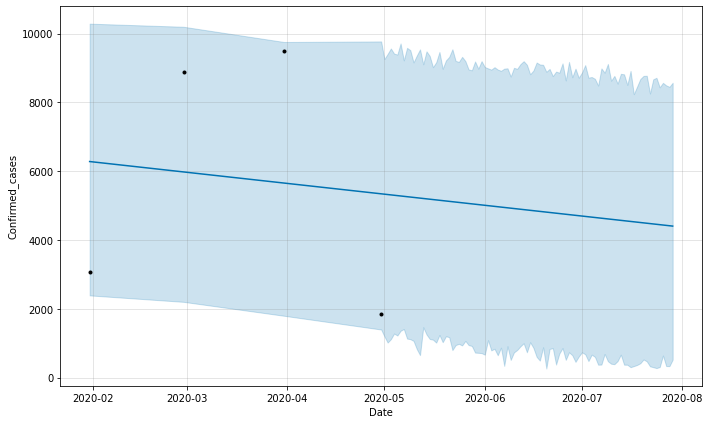

In [30]:
# Let's see explore forecast for next 90 days

figure = m.plot(forecast, xlabel='Date', ylabel = 'Confirmed_cases')

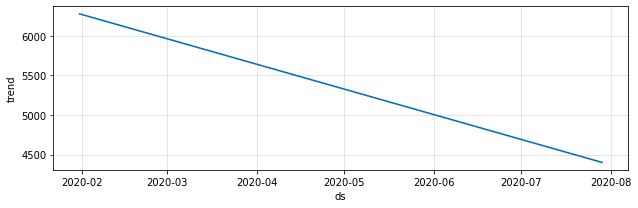

In [31]:
figure2 = m.plot_components(forecast)